# Hypothesis Testing Exercises

Do your work for this exercise in a jupyter notebook named hypothesis_testing.ipynb.

For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like. Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested.

- Has the network latency gone up since we switched internet service providers?

H0 = Our latency has gone up since switching internet service providers

HA = Our latency has not gone up since switching internet service providers

- Is the website redesign any good?

H0 = The website redesign's new banners does not change difficulty in navigating between categories

HA = The website redesign's new banners make it easier to navigate between categories

True Positive = The websites new banners make it easier to navigate

True Negative = Websites diffuclty to navigate has not changed

Type 1 = There has been no difficulty change where there is a change

Type 2 = There has been no difficulty change where there is no change
- Is our television ad driving more sales?

H0 = The television ad does not affect sales

HA = The television ad increased sales

True Positive = The ad increased sales

True Negative = The ad did not affect sales

Type 1 = The ad caused sales go up, but they didn't

Type 2 = The ad caused no change in sales, but sales increased

#  T-Test Exercises

Continue working in your hypothesis_testing notebook.

- Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

- Load the mpg dataset and use it to answer the following questions:

    - Is there a difference in fuel-efficiency in cars from 2008 vs 1999?
    - Are compact cars more fuel-efficient than the average car?
    - Do manual cars get better gas mileage than automatic cars?

In [1]:
from scipy import stats
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
alpha = 0.5

### Ace Realty
$H_{0}$: The time it takes to sell homes are the same

$H_{a}$: The time it takes to sell homes are different

In [2]:
t, p = stats.ttest_ind_from_stats(100, 20, 50, 90, 15, 40)
t, p/2, alpha

(2.6252287036468456, 0.005104926224619695, 0.5)

In [3]:
if (p/2 < alpha) & (t > 0):
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

We reject the null hypothesis


### MPG
- Is there a difference in fuel-efficiency in cars from 2008 vs 1999?
- Are compact cars more fuel-efficient than the average car?
- Do manual cars get better gas mileage than automatic cars?

In [4]:
from pydataset import data
mpg = data('mpg')

In [5]:
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


### Fuel Efficiency:
$H_{0}$: There is not a difference in fuel effiency in cars from 2008 vs 1999

$H_{a}$: There is a difference in fuel efficiency in cars from 2008 vs 1999

In [6]:
## More appropriate to use harmonic mean than arithmetic mean in cases like fuel efficiency
# fe_am = (cty + hwy)/2
# fe_hm = fe_hm = 2/(1/cty + 1/hwy)

In [7]:
mpg['fuel_efficiency'] = mpg.cty + mpg.hwy / 2

In [8]:
mpg_2008 = mpg[mpg.year == 2008].fuel_efficiency
mpg_1999 = mpg[mpg.year == 1999].fuel_efficiency

In [9]:
mpg_2008.var(), mpg_1999.var()

(47.87183171234894, 54.9290450928382)

In [10]:
## levene test returns p value, small p = unequal variances
stats. levene(mpg_2008, mpg_1999)

LeveneResult(statistic=0.03933438136733297, pvalue=0.8429613652019783)

In [11]:
t, p = stats.ttest_ind(mpg_2008, mpg_1999)

t, p/2, alpha

(-0.3236957615075298, 0.37322999315857086, 0.5)

In [12]:
if (p/2 < alpha) & (t > 0):
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

We fail to reject the null hypothesis


### Compact vs Average
$H_{0}$: Are compact cars efficiency <= average car

$H_{a}$: Are compact cars efficiency > average car

In [13]:
compact = mpg[mpg['class'] == 'compact'].fuel_efficiency
avg_car_fe = mpg.fuel_efficiency

In [14]:
t, p = stats.ttest_1samp(compact, avg_car_fe.mean())
t, p/2, alpha

(7.511409508514616, 7.834329026583027e-10, 0.5)

In [15]:
if (p/2 < alpha) & (t > 0):
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

We reject the null hypothesis


### Do manual cars get better gas mileage than automatic cars?
$H_{0}$: Are manual cars efficiency <= average car

$H_{a}$: Are manual cars efficiency > average car

In [16]:
manual = mpg[mpg.trans.str.startswith('m')].fuel_efficiency
automatic = mpg[mpg.trans.str.startswith('a')].fuel_efficiency

In [17]:
manual.var(), automatic.var()

(54.45625427204375, 43.387412216233834)

In [18]:
t, p = stats.ttest_ind(manual, automatic, equal_var = False)
t, p/2, alpha

(4.4872852093583395, 7.579902269116275e-06, 0.5)

In [19]:
if (p/2 < alpha) & (t > 0):
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

We reject the null hypothesis


# Correlation Exercises

1. Use the telco_churn data. Does tenure correlate with monthly charges? Total charges? What happens if you control for phone and internet service?
2. Use the employees database.
- Is there a relationship between how long an employee has been with the company and their salary?
- Is there a relationship between how long an employee has been with the company and the number of titles they have had?
3. Use the sleepstudy data. Is there a relationship between days and reaction time?

### 1. Use the telco_churn data. Does tenure correlate with monthly charges? Total charges? What happens if you control for phone and internet service?

In [20]:
telco_churn = pd.read_csv('telco_churn.csv')
telco_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


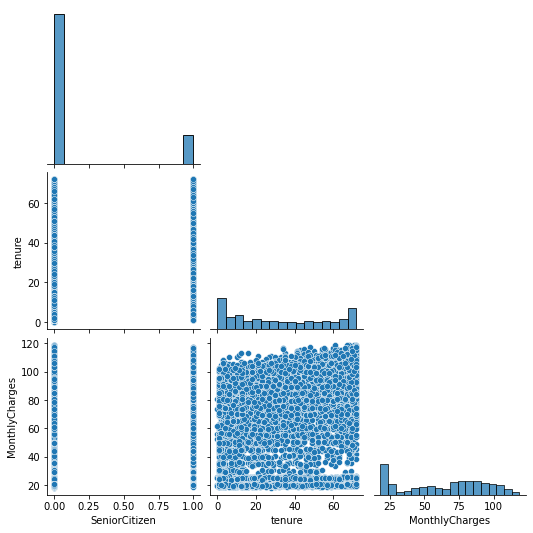

In [21]:
sns.pairplot(telco_churn, corner = True)

$H_{0}$: There is no correltion between tenure and monthly charges

$H_{a}$: There is a correltion between tenure and monthly charges

In [22]:
x = telco_churn.tenure
y = telco_churn.MonthlyCharges

corr, p = stats.pearsonr(x,y)
corr, p

(0.2478998562861525, 4.094044991483017e-99)

$H_{0}$:There is no correlation between the tenure and total charges

$H_{a}$:There is a correlation between the tenure and total charges





In [23]:
telco_churn.TotalCharges = telco_churn.TotalCharges.str.strip()
telco_churn = telco_churn[telco_churn.TotalCharges != ""]
telco_churn.TotalCharges = telco_churn.TotalCharges.astype(float)

/opt/homebrew/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [24]:
x = telco_churn.tenure
y = telco_churn.TotalCharges

corr, p = stats.pearsonr(x,y)
corr, p

(0.8258804609332093, 0.0)

What happens if you control for phone and internet service?

### 2. Use the employees database.
- Is there a relationship between how long an employee has been with the company and their salary?
- Is there a relationship between how long an employee has been with the company and the number of titles they have had?

In [25]:
### No stable internet connection so I cannot connect at the moment.

# def get_db_url(db_name):
#     from env import host, user, password
#     return f'mysql+pymysql://{user}:{password}@{host}/{db_name}'
# employees_url = get_db_url('employees')
# employees_query = 'select * from salaries join titles using(emp_no)'
# employees = pd.read_sql(employees_query, employees_url)

### 3. Use the sleepstudy data. Is there a relationship between days and reaction time?

In [26]:
sleepstudy = data("sleepstudy")
sleepstudy.head()

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308


/opt/homebrew/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='tenure', ylabel='TotalCharges'>

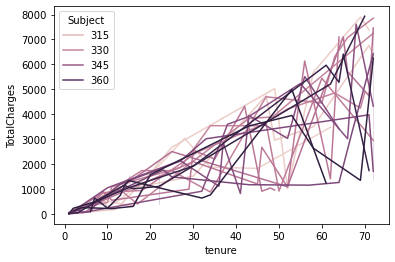

In [27]:
sns.lineplot(x,y, hue = sleepstudy.Subject)

$H_{0}$:There is no correlation between the days and reaction time

$H_{a}$:There is a correlation between the days and reaction time

In [28]:
x = sleepstudy.Days
y = sleepstudy.Reaction

stats.pearsonr(x,y)

(0.5352302262650253, 9.894096322214812e-15)